<a href="https://colab.research.google.com/github/sancoap/pytorch1/blob/main/Regression_Moore_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#pandas is useful for working with CSV files
#numpy is for numerical operations on matrices etc.
#plt is for plotting the data
#torch is pytorch
#torch.nn has utilities that we use e.g.

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [8]:
#Retrieve the dataset using wget, bang (!) is for executing linux cmd in notebooks
#nc is no-clobber, if file already exists, it will not be downloaded again
#I just downloaded the files, its available here - https://github.com/lazyprogrammer/machine_learning_examples/blob/master/tf2.0/moore.csv
#This URL is INCORRECT!!
!wget -nc https://github.com/lazyprogrammer/machine_learning_examples/tree/master/linear_regression_class/moore.csv


File ‘moore.csv’ already there; not retrieving.



In [27]:
#Read the Data using Pandas
#this 'data' denotes a dataframe, print(type(data))
#in pandas .values returns the Numpy representation of the data
#only values are returned in an Array
data = pd.read_csv('moore.csv', header=None).values


In [28]:
#to preview data, just type data!!!
data


array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [29]:
#num of rows * num of cols
data.shape


(162, 2)

In [30]:
#dimensions of data (columns)
data.ndim

2

In [33]:
#this work for pandas and not a numpy array (which is returned if I use .values)
#data.head

In [32]:
#data.tail(10)

In [38]:
#X represents ALL the rows for Column 0
X = data[:,0].reshape(-1,1) 
#X

In [39]:
#Y represents ALL the rows for column 1
Y = data[:,1].reshape(-1,1) 
#Y

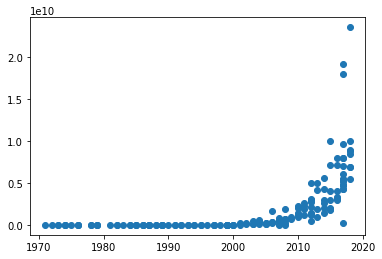

In [40]:
#a nice exponential data representation is shows, number of transistors vs. year
#the scale of Y-Axis is based on the range of the transistors
plt.scatter(X,Y)

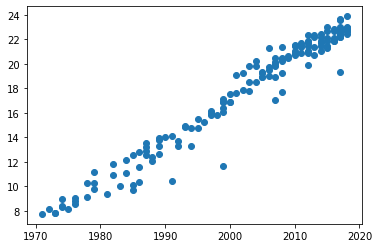

In [41]:
#if we take the log, this turns into a LINEAR function,
#so we can use the log and solve this as a linear regression problem
#since Y is growing exponentially, and X is the year, we don't need to take log of X
#The Y axis is now representing the log of the value of the transistors
Y = np.log(Y)
plt.scatter(X,Y)

In [42]:
#Now we need to scale and center the X and Y Axes
#Basically we are normalizing the data here
#Note the Units no longer make sense
meanx = X.mean()
stdx = X.std()
meany = Y.mean()
stdy = Y.std()
X = (X - meanx) / stdx 
Y = (Y - meany) / stdy 



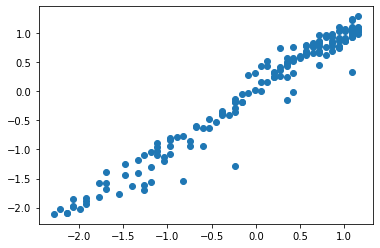

In [43]:
#Essentially the same plot but in a small range
plt.scatter(X,Y)

In [44]:
#Now we need to pre-process data to convert it into Float32 so we can work with Torch Tensors
X = X.astype(np.float32)
Y = Y.astype(np.float32)


In [45]:
#Create the model
#1 input and 1 output
model = nn.Linear(1,1)

In [46]:
#Set Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [47]:
#Here we do the actual conversion of the numpy arrays into Torch Tensors
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)


In [48]:
#verify the type
type(inputs)

torch.Tensor

In [51]:
#Write code to train the models, same as before
#you need trial and error till loss per iteration looks right
n_epochs = 100
losses = []
for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()
  #Forward Pass
  outputs = model(inputs)
  loss = criterion(outputs,targets)

  #record the loss
  losses.append(loss.item())

  #backward pass
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/100, Loss: 3.0709
Epoch 2/100, Loss: 2.9508
Epoch 3/100, Loss: 2.7545
Epoch 4/100, Loss: 2.5163
Epoch 5/100, Loss: 2.2612
Epoch 6/100, Loss: 2.0064
Epoch 7/100, Loss: 1.7627
Epoch 8/100, Loss: 1.5368
Epoch 9/100, Loss: 1.3318
Epoch 10/100, Loss: 1.1488
Epoch 11/100, Loss: 0.9875
Epoch 12/100, Loss: 0.8467
Epoch 13/100, Loss: 0.7248
Epoch 14/100, Loss: 0.6198
Epoch 15/100, Loss: 0.5299
Epoch 16/100, Loss: 0.4532
Epoch 17/100, Loss: 0.3880
Epoch 18/100, Loss: 0.3327
Epoch 19/100, Loss: 0.2859
Epoch 20/100, Loss: 0.2464
Epoch 21/100, Loss: 0.2131
Epoch 22/100, Loss: 0.1850
Epoch 23/100, Loss: 0.1614
Epoch 24/100, Loss: 0.1415
Epoch 25/100, Loss: 0.1249
Epoch 26/100, Loss: 0.1109
Epoch 27/100, Loss: 0.0992
Epoch 28/100, Loss: 0.0893
Epoch 29/100, Loss: 0.0811
Epoch 30/100, Loss: 0.0741
Epoch 31/100, Loss: 0.0683
Epoch 32/100, Loss: 0.0635
Epoch 33/100, Loss: 0.0594
Epoch 34/100, Loss: 0.0560
Epoch 35/100, Loss: 0.0531
Epoch 36/100, Loss: 0.0508
Epoch 37/100, Loss: 0.0488
Epoch 38/1

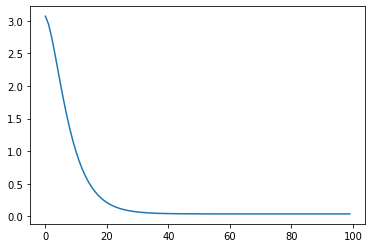

In [54]:
#no need to use scatterplot, just plot the losses array
#losses is a 1-D array, so plot just adds the X Axis by itself (based on num of rows)
#verify that loss has converged
#losses
plt.plot(losses)

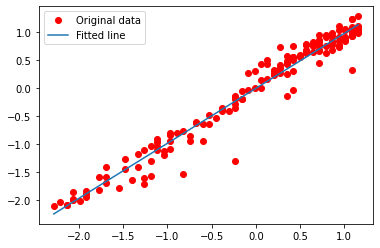

In [56]:
#we are now detaching the data from Torch tensor and getting it back into Numpy Array
#plot line of best fit
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y, 'ro', label = 'Original data')
plt.plot(X,predicted, label = 'Fitted line')
plt.legend()
plt.show()


In [57]:
#get the trained weights of the model
w = model.weight.data.numpy()
print(w)

[[0.98024094]]


In [59]:
a = w[0,0] * stdy / stdx
print(a)


0.341567434622701


In [60]:
#we are finally able to confirm that it takes around 2 years for number of transistors to double
print('Time to double', np.log(2) / a)


Time to double 2.0293128392804864
